In [10]:
# Install the needed libraries
!pip install nltk gensim datasets seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.1 MB/s eta 0:00:00


In [11]:
# Import the dataset
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
dataset = load_dataset("stanfordnlp/imdb")

In [7]:
# Extract features (text) and labels from the training portion of the dataset
X_tr = dataset['train']['text']
y_tr = dataset['train']['label']

# Extract features (text) and labels from the testing portion of the dataset
X_te = dataset['test']['text']
y_te = dataset['test']['label']

# Tokenize the text data (Flag: Might want consider using a tokenizer for this later)
X_tr_tokenized = [text.split() for text in X_tr]
X_te_tokenized = [text.split() for text in X_te]

# Train Word2Vec model on the tokenized text data

# Hyperparameters:
# vector_size: Size of the vector produced for a given word
# window: The maximum distance between the current and predicted word within a sentence. Words outside this window are not considered in the context.
# min_count: The minimum number of times a word must appear in the sentence to be considered

# Other parameters:
# workers: The amount of threads to be used
word2vec_model = Word2Vec(sentences=X_tr_tokenized, vector_size=600, window=450, min_count=5, workers=4)

# Function to convert text to Word2Vec embeddings
def get_word2vec_embeddings(text_data, model):
    embeddings = []
    for text in text_data:
        wordvecs = [model.wv[word] for word in text if word in model.wv]
        if wordvecs:
            embeddings.append(np.mean(wordvecs, axis=0))
        else:
            embeddings.append(np.zeros(model.vector_size))
    return embeddings

# Convert the text data to Word2Vec embeddings
X_tr_vec = get_word2vec_embeddings(X_tr_tokenized, word2vec_model)
X_te_vec = get_word2vec_embeddings(X_te_tokenized, word2vec_model)

# Standardize the vector length
scaler = StandardScaler()
X_tr_vec = scaler.fit_transform(X_tr_vec)
X_te_vec = scaler.transform(X_te_vec)

In [4]:
# Train kNN classifier

# Hyperparameters:
# n_neigbors: The number of neighbors to consider
knn_classifier = KNeighborsClassifier(n_neighbors=200)
knn_classifier.fit(X_tr_vec, y_tr)

# Evaluate the classifier on the testing set
y_pred = knn_classifier.predict(X_te_vec)
print(classification_report(y_te, y_pred))



              precision    recall  f1-score   support

           0       0.68      0.85      0.76     12500
           1       0.80      0.61      0.69     12500

    accuracy                           0.73     25000
   macro avg       0.74      0.73      0.72     25000
weighted avg       0.74      0.73      0.72     25000



NameError: name 'plt' is not defined

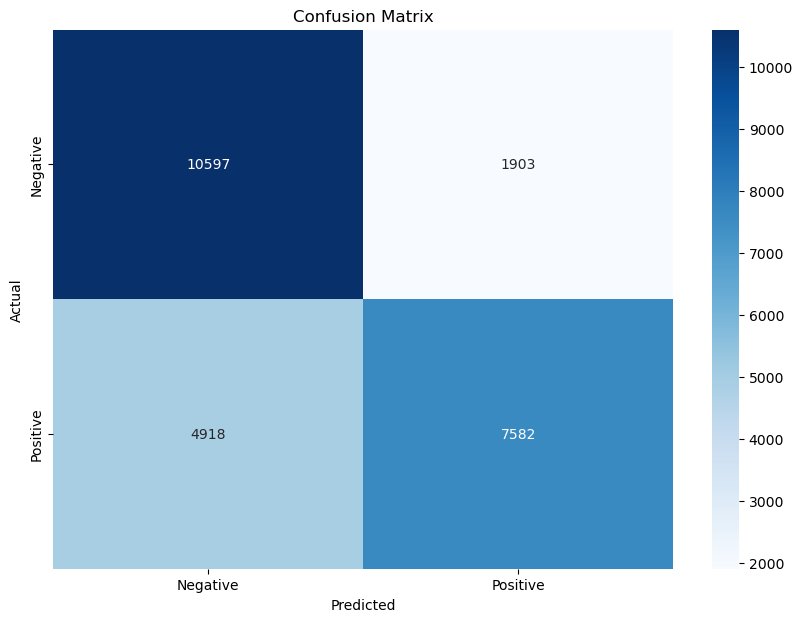

In [12]:
# Generate the confusion matrix 
cm = confusion_matrix(y_te, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Log of hyperparameters and associated reports (View markdown for better formatting):

vector_size=100, window=5, min_count=1, workers=4, n_neighbors=5

              precision    recall  f1-score   support

           0       0.65      0.70      0.67     12500
           1       0.67      0.62      0.64     12500

    accuracy                           0.66     25000
    macro avg       0.66      0.66      0.66     25000
    weighted avg       0.66      0.66      0.66     25000

<hr>
vector_size=300, window=5, min_count=1, workers=4, n_neighbors=5

              precision    recall  f1-score   support

           0       0.65      0.69      0.67     12500
           1       0.67      0.63      0.65     12500

    accuracy                           0.66     
    0
   mvg             0.66      0.66      0.66    
    2500hted avg              0.66      0.66      0.66   

<hr>
vector_size=300, window=5, min_count=1, workers=4, n_neighbors=10

             precision    recall  f1-score   support

           0       0.64      0.78      0.70     12500
           1       0.72      0.55      0.62     12500

    accuracy                           0.67     
    0
   macro avg       0.68      0.67      0.66    
    25000
weighted avg       0.68      0.67      0.66   

<hr>
vector_size=300, window=10, min_count=1, workers=4, n_neighbors=10

              precision    recall  f1-score   support

           0       0.65      0.78      0.71     12500
           1       0.73      0.58      0.64     12500

    accuracy                           0.68     
    0
   macro avg       0.69      0.68      0.68    
    25000
weighted avg       0.69      0.68      0.68   

<hr>
vector_size=300, window=10, min_count=1, workers=4, n_neighbors=300

             precision    recall  f1-score   support

           0       0.65      0.80      0.72     12500
           1       0.74      0.57      0.64     12500

    accuracy                           0.68     
    0
   macro avg       0.69      0.68      0.68    
    25000
weighted avg       0.69      0.68      0.68   

<hr>
vector_size=300, window=100, min_count=1, workers=4, n_neighbors=300

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     12500
           1       0.77      0.61      0.68     12500

    accuracy                           0.71     2500 0
   macro avg       0.72      0.71      0.71         25000
weighted avg       0.72      0.71      0.71   

<hr>
vector_size=300, window=100, min_count=5, workers=4, n_neighbors=300

              precision    recall  f1-score   support

           0       0.68      0.83      0.75     12500
           1       0.79      0.61      0.69     12500

    accuracy                           0.72     2500 0
   macro avg       0.73      0.72      0.72         25000
weighted avgvector_size=300, window=100, min_count=5, workers=4, n_neighbors=500

              precision    recall  f1-score   support

           0       0.67      0.83      0.75     12500
           1       0.78      0.59      0.68     12500

    accuracy                           0.71     25000
   macro avg       0.73      0.71      0.71     25000
weighted avg       0.73      0.71      0.71   

<hr> vector_size=300, window=500, min_count=5, workers=4, n_neighbors=500

              precision    recall  f1-score   support

           0       0.65      0.87      0.74     12500
           1       0.80      0.53      0.64     12500

    accuracy                           0.70     25000
   macro avg       0.73      0.70      0.69     25000
weighted avg       0.73      0.70      0.69   

<hr>
vector_size=300, window=300, min_count=5, workers=4, n_neighbors=500

              precision    recall  f1-score   support

           0       0.67      0.85      0.75     12500
           1       0.80      0.58      0.67     12500

    accuracy                           0.72     25000
   macro avg       0.73      0.72      0.71     25000
weighted avg       0.73      0.72      0.71   

<hr>
vector_size=300, window=300, min_count=5, workers=4, n_neighbors=159

              precision    recall  f1-score   support

           0       0.69      0.84      0.75     12500
           1       0.79      0.62      0.69     12500

    accuracy                           0.73     25000
   macro avg       0.74      0.73      0.72     25000
weighted avg       0.74      0.73      0.72   

<hr>
vector_size=500, window=300, min_count=5, workers=4, n_neighbors=159

              precision    recall  f1-score   support

           0       0.69      0.84      0.76     12500
           1       0.80      0.63      0.70     12500

    accuracy                           0.73     25000
   macro avg       0.74      0.73      0.73     25000
weighted avg       0.74      0.73      0.73   

<hr>
vector_size=750, window=300, min_count=5, workers=4, n_neighbors=159

              precision    recall  f1-score   support

           0       0.68      0.84      0.75     12500
           1       0.79      0.61      0.69     12500

    accuracy                           0.72     25000
   macro avg       0.73      0.72      0.72     25000
weighted avg       0.73      0.72      0.72   

<hr>
vector_size=600, window=300, min_count=5, workers=4, n_neighbors=159

              precision    recall  f1-score   support

           0       0.70      0.84      0.76     12500
           1       0.80      0.64      0.71     12500

    accuracy                           0.74     25000
   macro avg25000  25000

<hr>vector_size=600, window=450, min_count=5, workers=4, n_neiighbors=159200


In [5]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_wordvecs)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('Word Embeddings (Word2Vec) - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

NameError: name 'PCA' is not defined